In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.naive_bayes import MultinomialNB
import string

from random import randint
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, recall_score, precision_score,f1_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#read my csv
posts = pd.read_excel('updated_data.xlsx')

In [ ]:
print(posts.head(3))

                                   preprocessed_text  \
0  tuesday house met madam speakerin chair nation...   
1  friday house met madam speakerin chair nationa...   
2  thursday house met madam speakerin chair natio...   

                           topic  
0         Legislation and Policy  
1  Governance and Administration  
2      Justice and Legal Affairs  


# Label Encoding the Classes

In [ ]:
posts['Xs'] =  posts.preprocessed_text +' '+ posts.topic #creat new column 'Xs'
posts['Y'] = LabelEncoder().fit(posts.topic.unique()).transform(posts.topic) #label encode

posts = posts[['Xs','Y','topic']] # Drop 'title' and 'content'

In [ ]:
#inspect the dataframe
posts.columns
posts.sample(5)

Index(['Xs', 'Y', 'topic'], dtype='object')

,Xs,Y,topic
4,friday house met madam first deputy speakerin ...,2,Education and Research
102,thursday house met madam speakerin chair natio...,3,Education and Research:
6,wednesday house met speaker settle hon member ...,1,Economy and Finance:
63,act Education and Research,2,Education and Research
60,wednesday house met mr second deputy speakerin...,8,Legislation and Policy


In [ ]:
post_content = posts.Xs
print('There are a total of {} topics'.format(len(post_content)))

index = randint(0,20)  #only inspect posts from the first 20 in the list
post_content[index]

There are a total of 107 topics


'friday house met madam first deputy speakerin chair national madam first deputy speakerpoint order raised hon mwiimbu mp minister home affair internal security hon mundubile leader opposition mr kampyongo member parliament shiwang andu constituency disregarding provision article constitution zambia asked question relating office question timemadam first deputy speaker hon member house recall friday house considering question oral answer hon minister fishery livestock hon chikote mp concluded responding question hon mwiimbu mp minister home affair internal security raised point order pursuant standing order national assembly zambia standing order hon mundubile leader opposition member parliament mporokoso constituency mr kampyongo hon member parliament shiwang andu point order hon mwiimbu mp inquired whether hon mundubile mp mr kampyongo mp order mislead house nation alleging executive interfering operation contrary article protects office interference added hon member disregarded prov

# Viewing the post distribution in relation to Classes

topic
Economy and Finance                2
Economy and Finance:              11
Education and Research             6
Education and Research:            5
Foreign Affairs and Diplomacy      6
Governance and Administration     12
Infrastructure and Development     8
Justice and Legal Affairs         11
Legislation and Policy            12
Public Health                     15
Security and Defense               8
Social Issues                     11
Name: topic, dtype: int64

<AxesSubplot:ylabel='topic'>

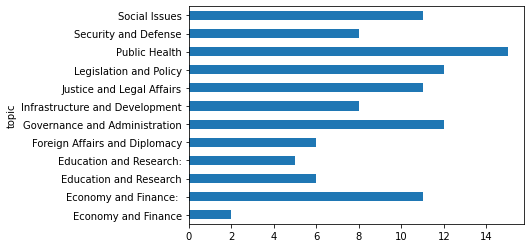

In [ ]:
#inspecting the distribution of comments
posts.groupby('topic').topic.count()
posts.groupby('topic').topic.count().plot.barh()

# Cleaning the posts
drop NaN records
make all words into lower case
remove punctuations and numbers
remove stopwords
stemming

In [ ]:
# 2. Case Folding
# Good idea to implement a function here [...]

def func_post_case_folding(contentText):
    return contentText.lower()


In [ ]:
# 3. Punctuation
# Function for removing punctuations from string of text
def func_post_punctuation(contentText):
    
    #replace special charactors with ' '
    contentText_out = re.sub('[^\w\s]', ' ',contentText)
    contentText_out = re.sub('_', '',contentText_out)
    
    #change any whitespace to one space
    contentText_out = re.sub('\s+', ' ',contentText_out)
    
    #remove start and end whitespaces
    contentText_out = contentText_out.strip()
    
    contentText_out = re.sub('\w*\d\w*', '', contentText_out) # replace digits
    return contentText_out

In [ ]:
# 5. Stemming
# Function for removing stopwords from string of text
# Remember: input will be chunck of text
def func_post_stem(contentText):
    var_stemmer = PorterStemmer()
    contentText_out = " ".join([
        var_stemmer.stem(contentText_word) for contentText_word in contentText.split() 
    ])
    return contentText_out

In [ ]:
# Uncomment this line to download the stopwords list (only need to run once)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Function for removing stopwords from string of text
def func_post_stopwords(contentText_in):
    stop_words = set(stopwords.words('english'))
    contentText_out = " ".join([
        contentText_word for contentText_word in contentText_in.split() 
        if contentText_word.lower() not in stop_words
    ])
    return contentText_out

In [ ]:
# 6. form the corpus

def func_get_all_words(content_list):
    all_words = []
    for item in content_list:
        for n in item.split():
            all_words.append(n)
    return all_words

In [ ]:
# 7. Term Frequency 

def func_tf_transform(all_words_list,clean_content_list):
    var_transformed_dataset = []
    for item in clean_content_list:
        #print (var_etd_entry)
        var_dataset = []
        var_tokens = item.split()
        for x in all_words_list:
            #print (var_dictionary_entry)
            var_dataset.append(var_tokens.count(x[0]))
        var_transformed_dataset.append(var_dataset)
    return var_transformed_dataset

In [ ]:
# function for functions to carry out step 2 to 5
# Function for removing stopwords from string of text

def func_clean_posts(content_list):
    
    temp_list = []
    for item in content_list:
        itemOut = func_post_case_folding(item)
        itemOut = func_post_punctuation(itemOut)
        itemOut = func_post_stopwords(itemOut)
        itemOut = func_post_stem(itemOut)
        
        temp_list.append(itemOut)
        
    return temp_list

In [ ]:
post_content.dropna(inplace= True)
post_content_list = list(post_content)

In [ ]:
#for the pusrpose of demostration, we will only clean 20 posts
clean_post_content_list = func_clean_posts(post_content_list)

In [ ]:
clean_post_content_list[index]

'friday hous met madam first deputi speakerin chair nation madam first deputi speakerpoint order rais hon mwiimbu mp minist home affair intern secur hon mundubil leader opposit mr kampyongo member parliament shiwang andu constitu disregard provis articl constitut zambia ask question relat offic question timemadam first deputi speaker hon member hous recal friday hous consid question oral answer hon minist fisheri livestock hon chikot mp conclud respond question hon mwiimbu mp minist home affair intern secur rais point order pursuant stand order nation assembl zambia stand order hon mundubil leader opposit member parliament mporokoso constitu mr kampyongo hon member parliament shiwang andu point order hon mwiimbu mp inquir whether hon mundubil mp mr kampyongo mp order mislead hous nation alleg execut interf oper contrari articl protect offic interfer ad hon member disregard provis articl mutaleent assembl chamber took first deputi speaker order hon member think know rule suppos stop sta

In [ ]:
#Check the length of the post before and after text cleaning.
len(post_content[index])
len(clean_post_content_list[index])

18222

16080

In [ ]:
cleanPosts = posts

In [ ]:
cleanPosts.dropna(subset=['Xs'], inplace=True)

In [ ]:
print(cleanPosts.Xs)

0      tuesday house met madam speakerin chair nation...
1      friday house met madam speakerin chair nationa...
2      thursday house met madam speakerin chair natio...
3      wednesday house met madam speakerin chair nati...
4      friday house met madam first deputy speakerin ...
                             ...                        
102    thursday house met madam speakerin chair natio...
103    wednesday madam first deputy speakerin chair h...
104    friday house met madam first deputy speakerin ...
105    tuesday house met madam speakerin chair nation...
106    thursday house met madam speakerin chair speak...
Name: Xs, Length: 107, dtype: object


In [ ]:
cleanPosts.Xs = clean_post_content_list
cleanPosts.to_excel('cleanPostClassification_no_numerics.xlsx')

In [ ]:
print(len(posts))  # should be 371
print(len(clean_post_content_list))  # should also be 371

107
107


# Load the cleaned data from the excel

In [ ]:
cleanPosts = pd.read_excel('cleanPostClassification_no_numerics.xlsx')
clean_post_content_list = list(cleanPosts.Xs)

In [ ]:
cleanPosts.sample(3)  #Sampling the imported clean texts.

,Unnamed: 0,Xs,Y,topic
5,5,thursday hous met madam first deputi speakerin...,11,Social Issues
26,26,wednesday hous met madam speakerin chair natio...,1,Economy and Finance:
60,60,wednesday hous met mr second deputi speakerin ...,8,Legislation and Policy


In [ ]:
#checking the frequence of the most common top 20 words
Counter(func_get_all_words(clean_post_content_list)).most_common(20)

[('speaker', 5835),
 ('hon', 5220),
 ('member', 4180),
 ('madam', 3090),
 ('govern', 2247),
 ('minist', 2018),
 ('peopl', 1898),
 ('order', 1809),
 ('mr', 1707),
 ('hous', 1620),
 ('matter', 1578),
 ('thank', 1457),
 ('public', 1272),
 ('question', 1155),
 ('go', 1086),
 ('import', 1080),
 ('hear', 1064),
 ('nation', 980),
 ('urgent', 949),
 ('zambia', 927)]

# Labels and Feature extraction

In [ ]:
# generates a dataframe of the mapping between Class and labels(Y)

Label_categories_df = cleanPosts[['topic', 'Y']].drop_duplicates().sort_values('Y').reset_index().drop(columns='index')
Label_categories_df

,topic,Y
0,Economy and Finance,0
1,Economy and Finance:,1
2,Education and Research,2
3,Education and Research:,3
4,Foreign Affairs and Diplomacy,4
5,Governance and Administration,5
6,Infrastructure and Development,6
7,Justice and Legal Affairs,7
8,Legislation and Policy,8
9,Public Health,9


In [ ]:
#Learning the vocabulary

# vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()
vectorizer.fit(clean_post_content_list)

TfidfVectorizer()

In [ ]:
#getting the tf-idf features and feature names

features = vectorizer.transform(clean_post_content_list)
features_columns = vectorizer.get_feature_names_out()

In [ ]:
#create a pandas dataframe

features_df = pd.DataFrame(features.toarray(), columns = features_columns)
features_df.shape

(107, 7980)

In [ ]:
#train_test_split?
x_train, x_test, y_train, y_test = train_test_split(features_df, cleanPosts['Y'], test_size=0.10)
len(x_train)
len(x_test)

96

11

In [ ]:
# Performing CV to tune parameters for best SVM fit
model = LinearSVC()
# model = LogisticRegression(multi_class= 'auto')
model.fit(x_train, y_train)

LinearSVC()

In [ ]:
model.score(x_test, y_test)
y_pred = model.predict(x_test)

0.2727272727272727

<AxesSubplot:>

Text(32.999999999999986, 0.5, 'Actual')

Text(0.5, 15.0, 'Predicted')

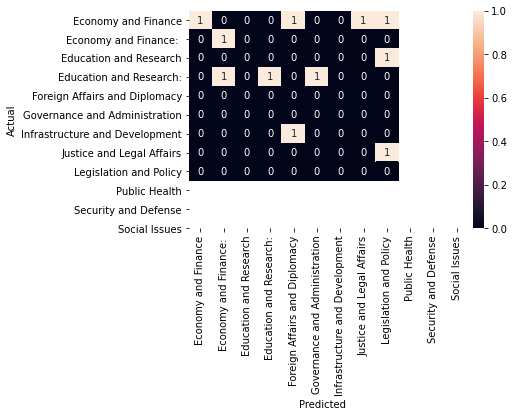

In [ ]:
# creating the confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=Label_categories_df.topic.values, yticklabels=Label_categories_df.topic.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(model,features_df, cleanPosts['Y'], cv=10, scoring='accuracy')
print(scores)

C:\Users\jonas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


[0.         0.09090909 0.         0.36363636 0.18181818 0.36363636
 0.45454545 0.4        0.5        0.3       ]


In [ ]:
print('The Cross-validation score is {}'.format(scores.mean()))

The Cross-validation score is 0.26545454545454544
